In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Load data

In [2]:
data_dir = "data/"
output_dir = "outputs/"
os.makedirs(output_dir, exist_ok=True)
# Load data
fpath = os.path.join(data_dir, "fate-master-dataset.xlsx")
df = pd.read_excel(fpath)
# Remove irrelevant data
orig_shape = df.shape
df = df.drop(["notes", "target_fishery_common", "target_fishery_species"], axis=1)
non_shark_families = [
    "Dasyatidae",
    "Mobulidae",
    "Myliobatidae",
    "Rajidae",
    "Torpedinidae",
]
df = df[~df.family.isin(non_shark_families)]
print(f"shape change: {orig_shape[0]-df.shape[0]} rows and {orig_shape[1]-df.shape[1]} columns removed.")
# Show
df

shape change: 38 rows and 3 columns removed.


,rfmo,species,common_name,family,gear_class,gear_type,fishery_type,flagstate,ocean,ocean_region,...,fate_type,fate_proportion,units,sample_size,methods,start_year,end_year,time_scale,reference,reviewer
0,WCPFC,Alopias superciliosus,bigeye thresher shark,Alopidae,longline,NaN,multispecies,NaN,Pacific,NaN,...,discard_dead,0.222505,count,1224.0,observer,2016,2018,annual,Public Domain Bycatch Data (Bycatch Data Excha...,EB
1,WCPFC,Alopias superciliosus,bigeye thresher shark,Alopidae,longline,NaN,multispecies,NaN,Pacific,NaN,...,discard_alive,0.674059,count,3708.0,observer,2016,2018,annual,Public Domain Bycatch Data (Bycatch Data Excha...,EB
2,WCPFC,Alopias superciliosus,bigeye thresher shark,Alopidae,longline,NaN,multispecies,NaN,Pacific,NaN,...,unknown,0.103436,count,569.0,observer,2016,2018,annual,Public Domain Bycatch Data (Bycatch Data Excha...,EB
3,WCPFC,Prionace glauca,blue shark,Carcharhinidae,longline,NaN,multispecies,NaN,Pacific,NaN,...,discard_dead,0.086033,count,9745.0,observer,2016,2018,annual,Public Domain Bycatch Data (Bycatch Data Excha...,EB
4,WCPFC,Prionace glauca,blue shark,Carcharhinidae,longline,NaN,multispecies,NaN,Pacific,NaN,...,discard_alive,0.584554,count,66213.0,observer,2016,2018,annual,Public Domain Bycatch Data (Bycatch Data Excha...,EB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,NaN,Sphyrna lewini,scalloped hammerhead,Sphyrnidae,longline,NaN,multispecies,USA,Atlantic,NW,...,discard_dead,0.504000,count,76.0,observer,1992,1997,sporadic,Beerkircher et al. 2008,ND
364,NaN,Sphyrna lewini,scalloped hammerhead,Sphyrnidae,longline,NaN,multispecies,USA,Atlantic,NW,...,discard_alive,0.343000,count,51.0,observer,1992,1997,sporadic,Beerkircher et al. 2008,ND
365,NaN,Carcharhinus plumbeus,sandbar shark,Carcharhinidae,longline,NaN,multispecies,USA,Atlantic,NW,...,retained_whole,0.355000,count,29.0,observer,1992,1997,sporadic,Beerkircher et al. 2008,ND
366,NaN,Carcharhinus plumbeus,sandbar shark,Carcharhinidae,longline,NaN,multispecies,USA,Atlantic,NW,...,discard_dead,0.230000,count,19.0,observer,1992,1997,sporadic,Beerkircher et al. 2008,ND


### Data cleaning

Rows without sample size

In [3]:
df[df.sample_size.isna()].to_excel("outputs/[issue] rows without sample size.xlsx")

Show the percentage of missing values in each column

In [4]:
nans = (df.isna().sum().sort_values(ascending=False)/len(df)*100).round(2)
nans = nans[nans > 0]
nans

gear_type       88.18
location        79.70
ocean_region    59.09
rfmo            47.88
flagstate       30.91
habitat         27.88
fishery_type     9.39
gear_class       6.67
ocean            4.24
family           2.42
species          2.42
sample_size      0.61
dtype: float64

Fill in missing categorical variables

In [5]:
df.gear_type = df.gear_type.fillna("unknown")
df.location = df.location.fillna("unknown")
df.ocean_region = df.ocean_region.fillna("unknown")
df.rfmo = df.rfmo.fillna("unknown")
df.flagstate = df.flagstate.fillna("unknown")
df.habitat = df.habitat.fillna("unknown")
df.fishery_type = df.fishery_type.fillna("unknown")
df.ocean = df.ocean.fillna("unknown")
df.gear_class = df.gear_class.fillna("unknown")
df.family = df.family.fillna("unknown")
df.species = df.species.fillna("unknown")

## Ocean wise

In [6]:
pacific = df[df.ocean == "Pacific"]
atlantic = df[df.ocean == "Atlantic"]
indian = df[df.ocean == "Indian"]
unknown = df[df.ocean == "unknown"]
oceans = [
    df[df.ocean == "Pacific"],
    df[df.ocean == "Atlantic"],
    df[df.ocean == "Indian"],
    df[df.ocean == "unknown"],
]

### Number of shark specimen caught from each family by fate type

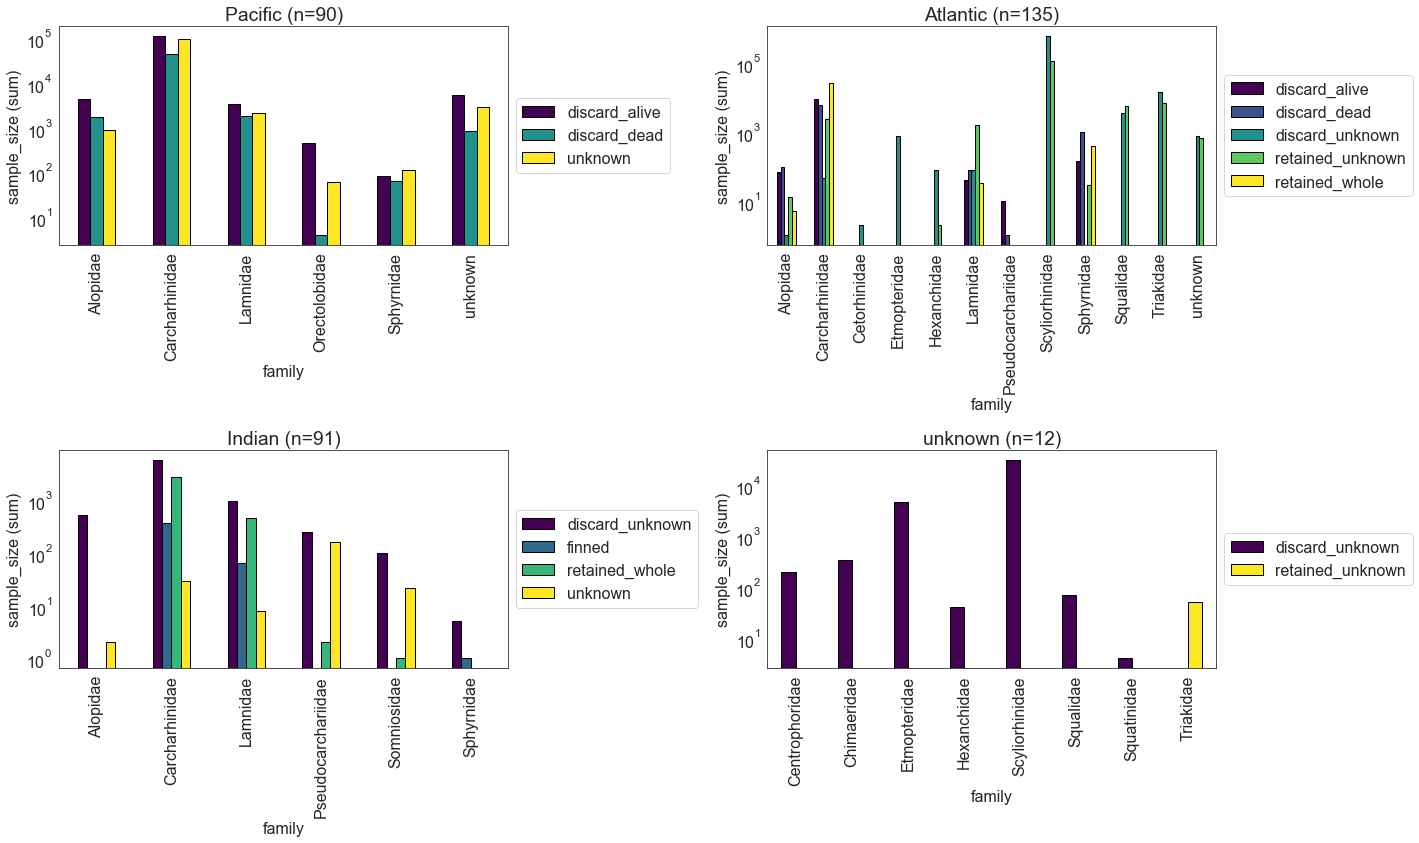

In [7]:
# Font settings
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

# Figure settings
fsize = (20, 12)
sns.set_style("white")
cmap = "viridis"

fig, axes = plt.subplots(nrows=2, ncols=2)
for ocean, ax in zip(oceans, axes.flatten()):
    ocean = ocean.replace("finned (fins kept, carcass discarded)", "finned")
    pt = ocean.pivot_table(
        index="family",
        columns="fate_type",
        values="sample_size",
        aggfunc=np.sum,
    )
    pt.plot(ax=ax, kind='bar', stacked=False, cmap=cmap, figsize=fsize, edgecolor="k")
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax.set_ylabel("sample_size (sum)")
    ax.set_yscale("log")
    ax.set_title(ocean.ocean.unique()[0]+f" (n={ocean.sample_size.notna().sum()})")
    pt.to_excel(f"outputs/number-of-shark-specimen-caught-in-each-family-by-fate-type_{ocean.ocean.unique()[0]}.xlsx")
    
plt.tight_layout()
plt.show()

fig.savefig(output_dir+"number of shark specimen caught from each family by fate type.jpg", dpi=300)

### Number of shark specimen caught from each family by gear class

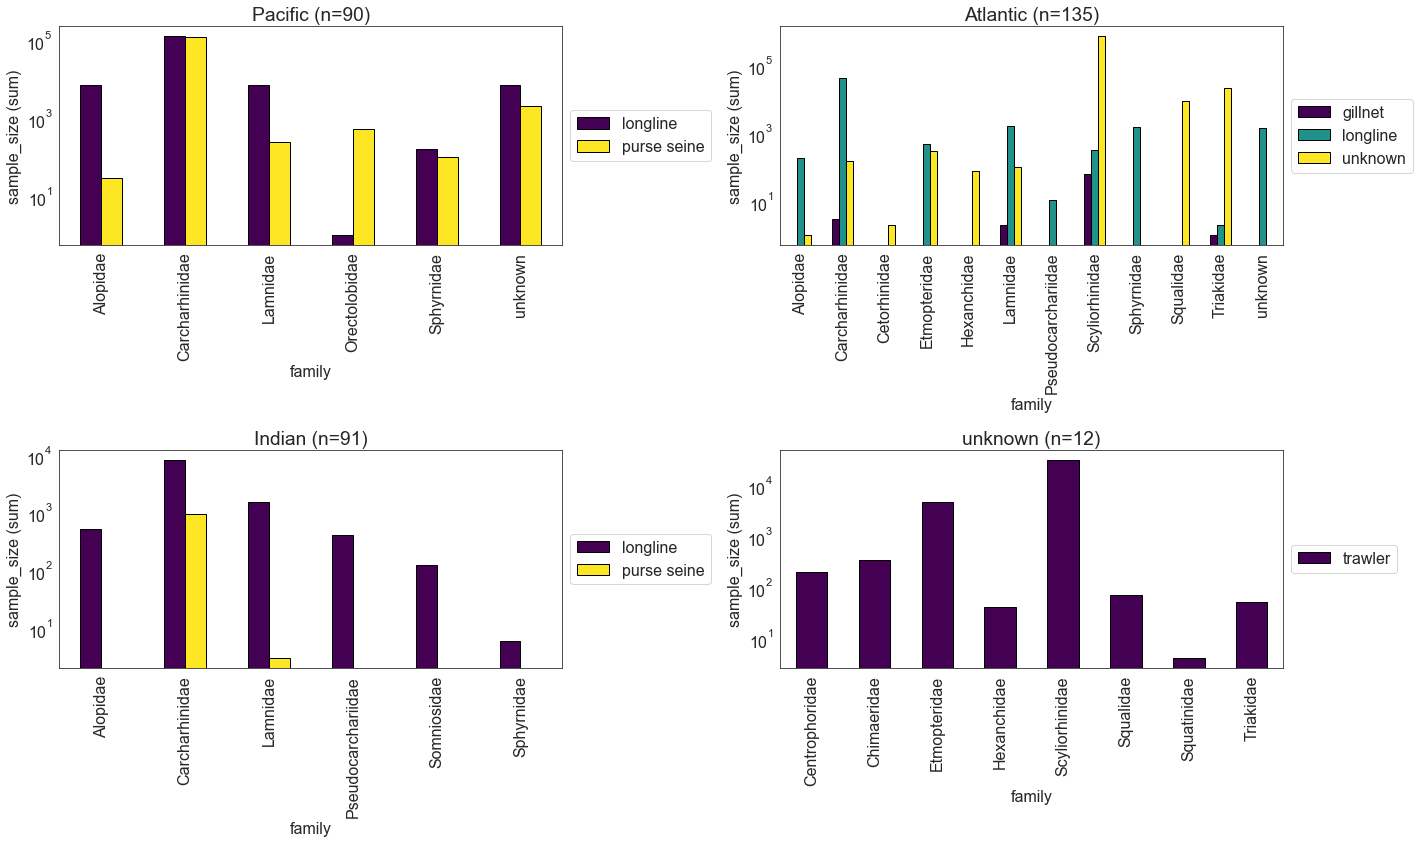

In [8]:
fsize = (20, 12)
sns.set_style("white")
cmap = "viridis"

fig, axes = plt.subplots(nrows=2, ncols=2)
for ocean, ax in zip(oceans, axes.flatten()):
    pt = ocean.pivot_table(
        index="family",
        columns="gear_class",
        values="sample_size",
        aggfunc=np.sum,
    )
    pt.plot(ax=ax, kind='bar', stacked=False, cmap=cmap, figsize=fsize, edgecolor="k")
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax.set_ylabel("sample_size (sum)")
    ax.set_yscale("log")
    ax.set_title(ocean.ocean.unique()[0]+f" (n={ocean.sample_size.notna().sum()})")
    pt.to_excel(f"outputs/number-of-shark-specimen-caught-in-each-family-by-gear-class_{ocean.ocean.unique()[0]}.xlsx")
plt.tight_layout()
plt.show()

fig.savefig(output_dir+"number of shark specimen caught from each family by gear class", dpi=300)

In [9]:
df[["fate_type", "fate_proportion", "sample_size"]]

,fate_type,fate_proportion,sample_size
0,discard_dead,0.222505,1224.0
1,discard_alive,0.674059,3708.0
2,unknown,0.103436,569.0
3,discard_dead,0.086033,9745.0
4,discard_alive,0.584554,66213.0
...,...,...,...
363,discard_dead,0.504000,76.0
364,discard_alive,0.343000,51.0
365,retained_whole,0.355000,29.0
366,discard_dead,0.230000,19.0


In [10]:
df.fate_type.value_counts() / df.fate_type.value_counts().sum()

discard_unknown                          0.239394
discard_dead                             0.200000
discard_alive                            0.200000
unknown                                  0.118182
retained_whole                           0.115152
retained_unknown                         0.096970
finned (fins kept, carcass discarded)    0.030303
Name: fate_type, dtype: float64

In [11]:
df.groupby("fate_type")[["sample_size"]].sum() / df.groupby("fate_type")[["sample_size"]].sum().sum()

,sample_size
fate_type,
discard_alive,0.117192
discard_dead,0.048724
discard_unknown,0.597704
"finned (fins kept, carcass discarded)",0.000393
retained_unknown,0.119829
retained_whole,0.026615
unknown,0.089544


In [12]:
[name for name in df.common_name.unique() if not("ray" in name) and not("skate" in name)]

['bigeye thresher shark',
 'blue shark',
 'great hammerhead',
 'hammerhead sharks nei',
 'longfin mako',
 'mako sharks',
 'oceanic whitetip shark',
 'pelagic thresher shark',
 'porbeagle shark',
 'scalloped hammerhead',
 'sharks nei',
 'shortfin mako',
 'silky shark',
 'smooth hammerhead',
 'thresher shark (vulpinus)',
 'thresher sharks nei',
 'whale shark',
 'blackmouth catshark',
 'smooth lanternshark',
 'small spotted catshark',
 'smoothhound shark',
 'shortfin mako shark',
 'tope shark',
 'tiger shark',
 'dusky shark',
 'crocodile shark',
 'requiem sharks nei',
 'velvet dogfish',
 'bluntnose sixgill shark ',
 'basking shark',
 'thresher shark',
 'nursehound',
 'school shark',
 'starry smooth-hound',
 'velvet belly lanternshark',
 'spiny dogfish',
 'gulper shark',
 'rabbit fish',
 'sharpnose seven gill shark',
 'common smooth-hound',
 'longnose spurdog',
 'sawback angelshark',
 'smoothback angelshark',
 'great white shark',
 'night shark',
 'sandbar shark',
 'great hammerhead shark'